In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',30)


In [2]:
data=pd.read_csv(r'C:\Users\Tunzale\Desktop\DSDS\16\credit_score.csv')
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [3]:
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [4]:
data=data.drop(['ID','CustomerID','Name','SSN','TypeofLoan'],axis=1)
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [5]:
data['score']=np.where(data['CreditScore']=='Poor',1,0)
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [6]:
data['score'].value_counts()

0    62145
1    25350
Name: score, dtype: int64

In [7]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

In [8]:
for column in data.columns:
    if data[column].dtype !='object':
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.000000,11.270000,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,23,Scientist,19114.12,4193.181285,3,4,3,4,-1,30.904324,11.270000,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,-500,Scientist,19114.12,4193.181285,3,4,3,4,3,7.000000,10.385851,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,23,Scientist,19114.12,4193.181285,3,4,3,4,5,4.000000,6.270000,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,30.904324,11.270000,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.000000,9.500000,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.000000,11.500000,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.000000,11.500000,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.000000,11.500000,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [9]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
score                     0
dtype: int64

In [10]:
data.corr()['score']

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_6828\1606058578.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['score']


Age                      -0.004274
AnnualIncome             -0.009860
MonthlyInhandSalary      -0.150101
NumBankAccounts           0.008252
NumCreditCard             0.007890
InterestRate              0.005670
NumofLoan                 0.007689
Delayfromduedate          0.372259
NumofDelayedPayment       0.002691
ChangedCreditLimit        0.063423
NumCreditInquiries        0.009709
OutstandingDebt           0.363620
CreditUtilizationRatio   -0.036634
TotalEMIpermonth         -0.002168
Amountinvestedmonthly    -0.107100
MonthlyBalance           -0.168818
score                     1.000000
Name: score, dtype: float64

In [11]:
data=data.drop(['Age','AnnualIncome','NumBankAccounts','NumCreditCard','InterestRate','NumofLoan','NumofDelayedPayment','NumCreditInquiries','TotalEMIpermonth'],axis=1)
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,Scientist,1824.843333,3,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,Scientist,4193.181285,-1,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,Scientist,4193.181285,3,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,Scientist,4193.181285,5,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,Scientist,1824.843333,6,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,Mechanic,3359.415833,23,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,Mechanic,3359.415833,18,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,Mechanic,3359.415833,27,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [12]:
data.dtypes

Month                      object
Occupation                 object
MonthlyInhandSalary       float64
Delayfromduedate            int64
ChangedCreditLimit        float64
OutstandingDebt           float64
CreditUtilizationRatio    float64
PaymentofMinAmount         object
Amountinvestedmonthly     float64
PaymentBehaviour           object
MonthlyBalance            float64
CreditScore                object
score                       int32
dtype: object

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data[['Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance','score']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["score"] = variables.columns
vif

,VIF,score
0,4.171459,Delayfromduedate
1,3.667094,OutstandingDebt
2,1.720172,Amountinvestedmonthly
3,2.167570,MonthlyBalance
4,1.701751,score


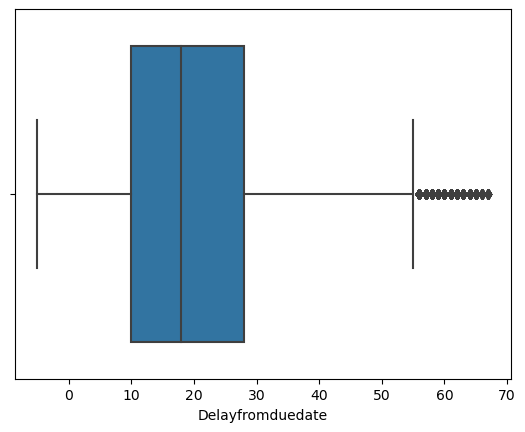

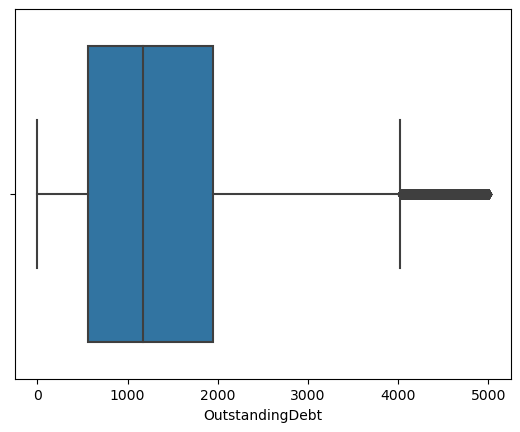

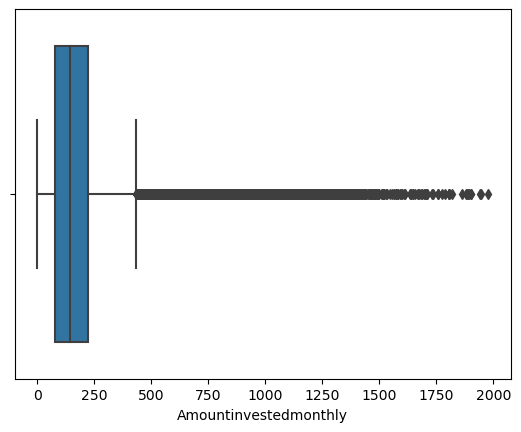

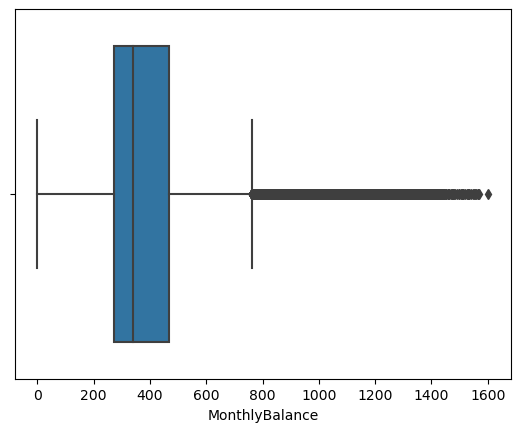

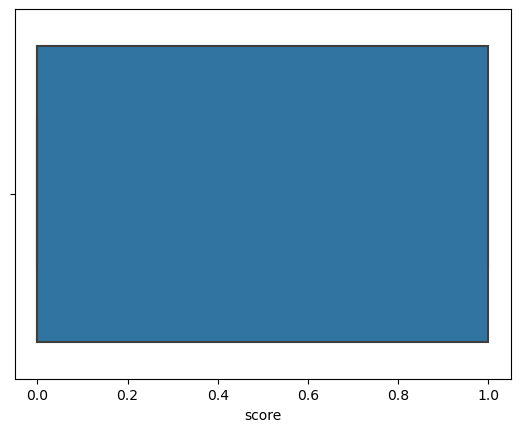

In [14]:
for i in data[['Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance','score']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [15]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_6828\2761603899.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
C:\Users\Tunzale\AppData\Local\Temp\ipykernel_6828\2761603899.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [16]:
Lower

MonthlyInhandSalary      -3583.053958
Delayfromduedate           -17.000000
ChangedCreditLimit          -8.397500
OutstandingDebt          -1507.470000
CreditUtilizationRatio      15.404249
Amountinvestedmonthly     -137.490871
MonthlyBalance             -24.197636
score                       -1.500000
dtype: float64

In [17]:
Upper

MonthlyInhandSalary       10751.811042
Delayfromduedate             55.000000
ChangedCreditLimit           28.462500
OutstandingDebt            4022.850000
CreditUtilizationRatio       49.150420
Amountinvestedmonthly       434.384557
MonthlyBalance              762.777973
score                         2.500000
dtype: float64

In [18]:
for i in data[['Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance','score']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])

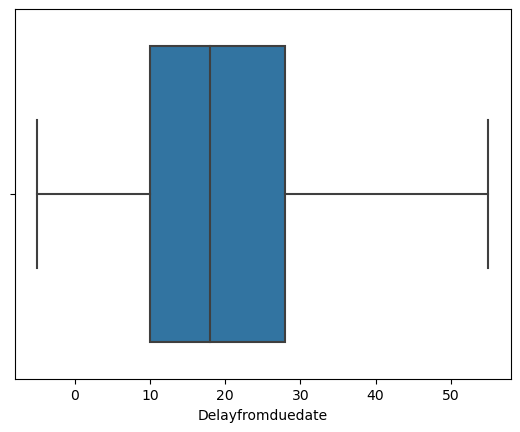

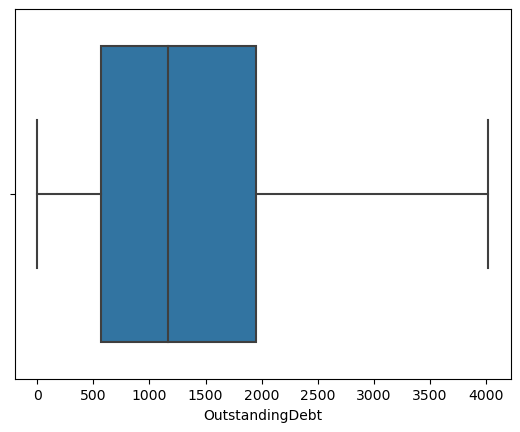

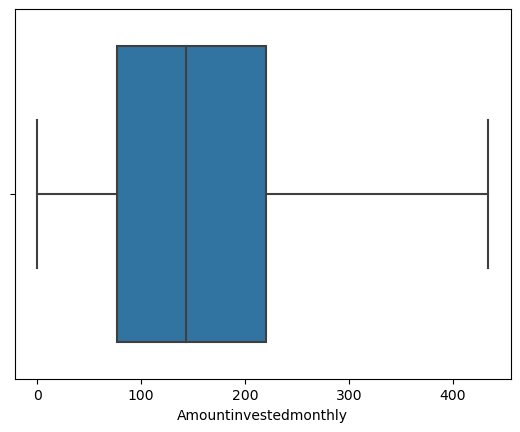

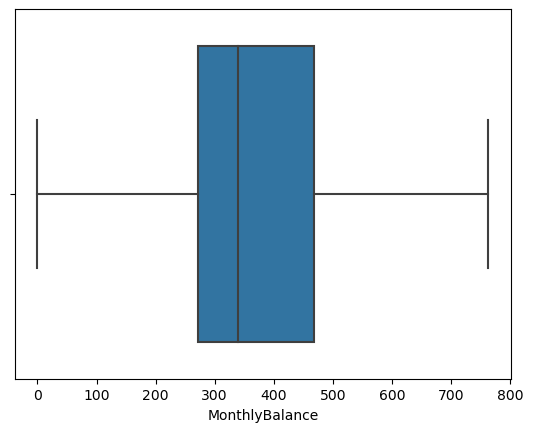

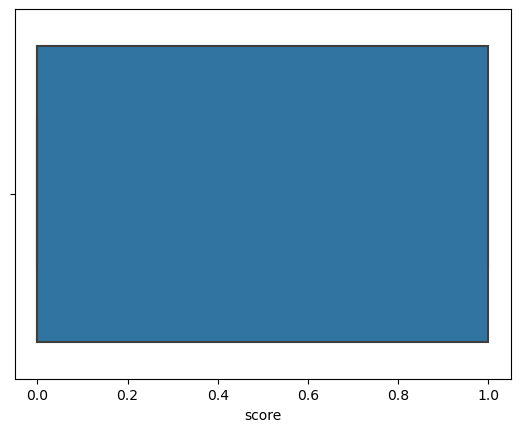

In [19]:
for i in data[['Delayfromduedate','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance','score']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [20]:
data_new=data.copy()
data_new

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0


In [21]:
grouped = data.groupby(['Month', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'month_woe'}, inplace=True)
data =data.merge(grouped[['Month','month_woe']], how='left', on='Month')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392


In [22]:
grouped=data.groupby(['Occupation','score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'Occupation_woe'}, inplace=True)
data = data.merge(grouped[['Occupation','Occupation_woe']], how='left', on='Occupation')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353


In [23]:
ranges=[-np.inf,data['Delayfromduedate'].quantile(0.25),data['Delayfromduedate'].quantile(0.5),data['Delayfromduedate'].quantile(0.75),np.inf]
data['category']=pd.cut(data['Delayfromduedate'],bins=ranges)

grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['woe']=np.log(grouped['positive']/grouped['negative'])
grouped

score,category,0.0,1.0,positive,negative,woe
0,"(-inf, 10.0]",20731,2957,0.333591,0.116647,1.050763
1,"(10.0, 18.0]",17180,4264,0.276450,0.168205,0.496847
2,"(18.0, 28.0]",14866,6708,0.239215,0.264615,-0.100916
3,"(28.0, inf]",9368,11421,0.150744,0.450533,-1.094846


In [24]:
grouped.rename(columns={'woe':'Delayfromduedate_woe'},inplace=True)

grouped

score,category,0.0,1.0,positive,negative,Delayfromduedate_woe
0,"(-inf, 10.0]",20731,2957,0.333591,0.116647,1.050763
1,"(10.0, 18.0]",17180,4264,0.276450,0.168205,0.496847
2,"(18.0, 28.0]",14866,6708,0.239215,0.264615,-0.100916
3,"(28.0, inf]",9368,11421,0.150744,0.450533,-1.094846


In [25]:
data=data.merge(grouped[['category','Delayfromduedate_woe']],how='left',on='category')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe,category,Delayfromduedate_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783,"(-inf, 10.0]",1.050763
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783,"(-inf, 10.0]",1.050763
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783,"(-inf, 10.0]",1.050763
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783,"(-inf, 10.0]",1.050763
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783,"(-inf, 10.0]",1.050763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353,"(18.0, 28.0]",-0.100916
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353,"(18.0, 28.0]",-0.100916
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353,"(10.0, 18.0]",0.496847
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353,"(18.0, 28.0]",-0.100916


In [26]:
grouped=data.groupby(['PaymentofMinAmount','score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'PaymentofMinAmount_woe'}, inplace=True)
data = data.merge(grouped[['PaymentofMinAmount','PaymentofMinAmount_woe']], how='left', on='PaymentofMinAmount')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783,"(-inf, 10.0]",1.050763,0.97376
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783,"(-inf, 10.0]",1.050763,0.97376
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783,"(-inf, 10.0]",1.050763,0.97376
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783,"(-inf, 10.0]",1.050763,0.97376
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783,"(-inf, 10.0]",1.050763,0.97376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353,"(18.0, 28.0]",-0.100916,0.97376
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353,"(18.0, 28.0]",-0.100916,0.97376
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353,"(10.0, 18.0]",0.496847,0.97376
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353,"(18.0, 28.0]",-0.100916,0.97376


In [27]:
ranges=[-np.inf,data['OutstandingDebt'].quantile(0.25),data['OutstandingDebt'].quantile(0.5),data['OutstandingDebt'].quantile(0.75),np.inf]
data['category']=pd.cut(data['OutstandingDebt'],bins=ranges)

grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['woe']=np.log(grouped['positive']/grouped['negative'])
grouped

score,category,0.0,1.0,positive,negative,woe
0,"(-inf, 566.4]",19635,2245,0.315955,0.088560,1.271917
1,"(566.4, 1166.23]",19500,2373,0.313782,0.093609,1.209568
2,"(1166.23, 1948.98]",13848,8033,0.222834,0.316884,-0.352109
3,"(1948.98, inf]",9162,12699,0.147429,0.500947,-1.223150


In [28]:
grouped.rename(columns={'woe':'OutstandingDebt_woe'},inplace=True)

grouped

score,category,0.0,1.0,positive,negative,OutstandingDebt_woe
0,"(-inf, 566.4]",19635,2245,0.315955,0.088560,1.271917
1,"(566.4, 1166.23]",19500,2373,0.313782,0.093609,1.209568
2,"(1166.23, 1948.98]",13848,8033,0.222834,0.316884,-0.352109
3,"(1948.98, inf]",9162,12699,0.147429,0.500947,-1.223150


In [29]:
data=data.merge(grouped[['category','OutstandingDebt_woe']],how='left',on='category')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783,"(566.4, 1166.23]",1.050763,0.97376,1.209568
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783,"(566.4, 1166.23]",1.050763,0.97376,1.209568
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783,"(566.4, 1166.23]",1.050763,0.97376,1.209568
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783,"(566.4, 1166.23]",1.050763,0.97376,1.209568
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783,"(566.4, 1166.23]",1.050763,0.97376,1.209568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353,"(-inf, 566.4]",-0.100916,0.97376,1.271917
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353,"(-inf, 566.4]",-0.100916,0.97376,1.271917
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353,"(-inf, 566.4]",0.496847,0.97376,1.271917
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353,"(-inf, 566.4]",-0.100916,0.97376,1.271917


In [30]:
ranges=[-np.inf,data['MonthlyBalance'].quantile(0.25),data['MonthlyBalance'].quantile(0.5),data['MonthlyBalance'].quantile(0.75),np.inf]
data['category']=pd.cut(data['MonthlyBalance'],bins=ranges)

grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['woe']=np.log(grouped['positive']/grouped['negative'])
grouped

score,category,0.0,1.0,positive,negative,woe
0,"(-inf, 270.918]",13131,8743,0.211296,0.344892,-0.489969
1,"(270.918, 338.591]",14419,7455,0.232022,0.294083,-0.237030
2,"(338.591, 467.662]",16456,5417,0.264800,0.213688,0.214456
3,"(467.662, inf]",18139,3735,0.291882,0.147337,0.683625


In [31]:
grouped.rename(columns={'woe':'MonthlyBalance_woe'},inplace=True)

grouped

score,category,0.0,1.0,positive,negative,MonthlyBalance_woe
0,"(-inf, 270.918]",13131,8743,0.211296,0.344892,-0.489969
1,"(270.918, 338.591]",14419,7455,0.232022,0.294083,-0.237030
2,"(338.591, 467.662]",16456,5417,0.264800,0.213688,0.214456
3,"(467.662, inf]",18139,3735,0.291882,0.147337,0.683625


In [32]:
data=data.merge(grouped[['category','MonthlyBalance_woe']],how='left',on='category')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe,MonthlyBalance_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783,"(270.918, 338.591]",1.050763,0.97376,1.209568,-0.237030
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783,"(270.918, 338.591]",1.050763,0.97376,1.209568,-0.237030
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783,"(270.918, 338.591]",1.050763,0.97376,1.209568,-0.237030
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783,"(-inf, 270.918]",1.050763,0.97376,1.209568,-0.489969
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783,"(338.591, 467.662]",1.050763,0.97376,1.209568,0.214456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353,"(338.591, 467.662]",-0.100916,0.97376,1.271917,0.214456
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353,"(467.662, inf]",-0.100916,0.97376,1.271917,0.683625
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353,"(467.662, inf]",0.496847,0.97376,1.271917,0.683625
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353,"(467.662, inf]",-0.100916,0.97376,1.271917,0.683625


In [33]:
grouped=data.groupby(['PaymentBehaviour','score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'PaymentBehaviour_woe'}, inplace=True)
data = data.merge(grouped[['PaymentBehaviour','PaymentBehaviour_woe']], how='left', on='PaymentBehaviour')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentBehaviour_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783,"(270.918, 338.591]",1.050763,0.97376,1.209568,-0.237030,0.087011
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783,"(270.918, 338.591]",1.050763,0.97376,1.209568,-0.237030,0.057730
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783,"(270.918, 338.591]",1.050763,0.97376,1.209568,-0.237030,-0.070569
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783,"(-inf, 270.918]",1.050763,0.97376,1.209568,-0.489969,-0.315796
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783,"(338.591, 467.662]",1.050763,0.97376,1.209568,0.214456,0.182672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353,"(338.591, 467.662]",-0.100916,0.97376,1.271917,0.214456,0.182672
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353,"(467.662, inf]",-0.100916,0.97376,1.271917,0.683625,0.391003
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353,"(467.662, inf]",0.496847,0.97376,1.271917,0.683625,0.182672
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353,"(467.662, inf]",-0.100916,0.97376,1.271917,0.683625,0.391003


In [34]:
ranges=[-np.inf,data['Amountinvestedmonthly'].quantile(0.25),data['Amountinvestedmonthly'].quantile(0.5),data['Amountinvestedmonthly'].quantile(0.75),np.inf]
data['category']=pd.cut(data['Amountinvestedmonthly'],bins=ranges)

grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['woe']=np.log(grouped['positive']/grouped['negative'])
grouped

score,category,0.0,1.0,positive,negative,woe
0,"(-inf, 76.962]",14597,7277,0.234886,0.287061,-0.200594
1,"(76.962, 143.313]",14964,6910,0.240792,0.272584,-0.124014
2,"(143.313, 219.931]",15605,6268,0.251106,0.247258,0.015442
3,"(219.931, inf]",16979,4895,0.273216,0.193097,0.347071


In [35]:
grouped.rename(columns={'woe':'Amountinvestedmonthly_woe'},inplace=True)

grouped

score,category,0.0,1.0,positive,negative,Amountinvestedmonthly_woe
0,"(-inf, 76.962]",14597,7277,0.234886,0.287061,-0.200594
1,"(76.962, 143.313]",14964,6910,0.240792,0.272584,-0.124014
2,"(143.313, 219.931]",15605,6268,0.251106,0.247258,0.015442
3,"(219.931, inf]",16979,4895,0.273216,0.193097,0.347071


In [36]:
data=data.merge(grouped[['category','Amountinvestedmonthly_woe']],how='left',on='category')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentBehaviour_woe,Amountinvestedmonthly_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783,"(76.962, 143.313]",1.050763,0.97376,1.209568,-0.237030,0.087011,-0.124014
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783,"(76.962, 143.313]",1.050763,0.97376,1.209568,-0.237030,0.057730,-0.124014
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783,"(76.962, 143.313]",1.050763,0.97376,1.209568,-0.237030,-0.070569,-0.124014
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783,"(143.313, 219.931]",1.050763,0.97376,1.209568,-0.489969,-0.315796,0.015442
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783,"(-inf, 76.962]",1.050763,0.97376,1.209568,0.214456,0.182672,-0.200594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353,"(76.962, 143.313]",-0.100916,0.97376,1.271917,0.214456,0.182672,-0.124014
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353,"(-inf, 76.962]",-0.100916,0.97376,1.271917,0.683625,0.391003,-0.200594
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353,"(-inf, 76.962]",0.496847,0.97376,1.271917,0.683625,0.182672,-0.200594
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353,"(-inf, 76.962]",-0.100916,0.97376,1.271917,0.683625,0.391003,-0.200594


In [37]:
ranges=[-np.inf,data['ChangedCreditLimit'].quantile(0.25),data['ChangedCreditLimit'].quantile(0.5),data['ChangedCreditLimit'].quantile(0.75),np.inf]
data['category']=pd.cut(data['ChangedCreditLimit'],bins=ranges)

grouped=data.groupby(['category','score'])['score'].count().unstack().reset_index()
grouped['positive']=grouped[0]/grouped[0].sum()
grouped['negative']=grouped[1]/grouped[1].sum()
grouped['woe']=np.log(grouped['positive']/grouped['negative'])
grouped

score,category,0.0,1.0,positive,negative,woe
0,"(-inf, 5.425]",15958,5916,0.256787,0.233373,0.095608
1,"(5.425, 9.56]",15714,6161,0.252860,0.243037,0.039621
2,"(9.56, 14.64]",16118,5763,0.259361,0.227337,0.131787
3,"(14.64, inf]",14355,7510,0.230992,0.296252,-0.248829


In [38]:
grouped.rename(columns={'woe':'ChangedCreditLimit_woe'},inplace=True)

grouped

score,category,0.0,1.0,positive,negative,ChangedCreditLimit_woe
0,"(-inf, 5.425]",15958,5916,0.256787,0.233373,0.095608
1,"(5.425, 9.56]",15714,6161,0.252860,0.243037,0.039621
2,"(9.56, 14.64]",16118,5763,0.259361,0.227337,0.131787
3,"(14.64, inf]",14355,7510,0.230992,0.296252,-0.248829


In [39]:
data=data.merge(grouped[['category','ChangedCreditLimit_woe']],how='left',on='category')
data

,Month,Occupation,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentBehaviour_woe,Amountinvestedmonthly_woe,ChangedCreditLimit_woe
0,January,Scientist,1824.843333,3.0,11.270000,809.98,26.822620,No,80.415295,HighspentSmallvaluepayments,312.494089,Good,0.0,0.013036,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,-0.237030,0.087011,-0.124014,0.131787
1,February,Scientist,4193.181285,-1.0,11.270000,809.98,31.944960,No,118.280222,LowspentLargevaluepayments,284.629163,Good,0.0,0.031453,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,-0.237030,0.057730,-0.124014,0.131787
2,March,Scientist,4193.181285,3.0,10.385851,809.98,28.609352,No,81.699521,LowspentMediumvaluepayments,331.209863,Good,0.0,0.021323,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,-0.237030,-0.070569,-0.124014,0.131787
3,April,Scientist,4193.181285,5.0,6.270000,809.98,31.377862,No,199.458074,LowspentSmallvaluepayments,223.451310,Good,0.0,-0.017560,-0.080783,"(5.425, 9.56]",1.050763,0.97376,1.209568,-0.489969,-0.315796,0.015442,0.039621
4,May,Scientist,1824.843333,6.0,11.270000,809.98,24.797347,No,41.420153,HighspentMediumvaluepayments,341.489231,Good,0.0,-0.019930,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,0.214456,0.182672,-0.200594,0.131787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Mechanic,3359.415833,20.0,9.500000,502.38,39.323569,No,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1.0,0.021323,-0.053353,"(5.425, 9.56]",-0.100916,0.97376,1.271917,0.214456,0.182672,-0.124014,0.039621
87491,April,Mechanic,3359.415833,23.0,11.500000,502.38,34.663572,No,60.971333,HighspentLargevaluepayments,479.866228,Poor,1.0,-0.017560,-0.053353,"(9.56, 14.64]",-0.100916,0.97376,1.271917,0.683625,0.391003,-0.200594,0.131787
87492,May,Mechanic,3359.415833,18.0,11.500000,502.38,40.565631,No,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1.0,-0.019930,-0.053353,"(9.56, 14.64]",0.496847,0.97376,1.271917,0.683625,0.182672,-0.200594,0.131787
87493,June,Mechanic,3359.415833,27.0,11.500000,502.38,41.255522,No,24.028477,HighspentLargevaluepayments,516.809083,Poor,1.0,-0.030392,-0.053353,"(9.56, 14.64]",-0.100916,0.97376,1.271917,0.683625,0.391003,-0.200594,0.131787


In [40]:
data=data.drop(['MonthlyInhandSalary','CreditUtilizationRatio','Month','Occupation','Delayfromduedate','CreditScore','ChangedCreditLimit','OutstandingDebt','PaymentofMinAmount','Amountinvestedmonthly','PaymentBehaviour','MonthlyBalance'],axis=1)
data


,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentBehaviour_woe,Amountinvestedmonthly_woe,ChangedCreditLimit_woe
0,0.0,0.013036,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,-0.237030,0.087011,-0.124014,0.131787
1,0.0,0.031453,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,-0.237030,0.057730,-0.124014,0.131787
2,0.0,0.021323,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,-0.237030,-0.070569,-0.124014,0.131787
3,0.0,-0.017560,-0.080783,"(5.425, 9.56]",1.050763,0.97376,1.209568,-0.489969,-0.315796,0.015442,0.039621
4,0.0,-0.019930,-0.080783,"(9.56, 14.64]",1.050763,0.97376,1.209568,0.214456,0.182672,-0.200594,0.131787
...,...,...,...,...,...,...,...,...,...,...,...
87490,1.0,0.021323,-0.053353,"(5.425, 9.56]",-0.100916,0.97376,1.271917,0.214456,0.182672,-0.124014,0.039621
87491,1.0,-0.017560,-0.053353,"(9.56, 14.64]",-0.100916,0.97376,1.271917,0.683625,0.391003,-0.200594,0.131787
87492,1.0,-0.019930,-0.053353,"(9.56, 14.64]",0.496847,0.97376,1.271917,0.683625,0.182672,-0.200594,0.131787
87493,1.0,-0.030392,-0.053353,"(9.56, 14.64]",-0.100916,0.97376,1.271917,0.683625,0.391003,-0.200594,0.131787


In [41]:
targets=data['score']
inputs=data.drop(['score'],axis=1)
inputs.columns

Index(['month_woe', 'Occupation_woe', 'category', 'Delayfromduedate_woe',
       'PaymentofMinAmount_woe', 'OutstandingDebt_woe', 'MonthlyBalance_woe',
       'PaymentBehaviour_woe', 'Amountinvestedmonthly_woe',
       'ChangedCreditLimit_woe'],
      dtype='object')

In [48]:
inputs=inputs[['month_woe', 'Occupation_woe',  'Delayfromduedate_woe',
       'PaymentofMinAmount_woe', 'OutstandingDebt_woe', 'MonthlyBalance_woe',
       'PaymentBehaviour_woe', 'Amountinvestedmonthly_woe',
       'ChangedCreditLimit_woe']]
inputs.head()

,month_woe,Occupation_woe,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentBehaviour_woe,Amountinvestedmonthly_woe,ChangedCreditLimit_woe
0,0.013036,-0.080783,1.050763,0.97376,1.209568,-0.237030,0.087011,-0.124014,0.131787
1,0.031453,-0.080783,1.050763,0.97376,1.209568,-0.237030,0.057730,-0.124014,0.131787
2,0.021323,-0.080783,1.050763,0.97376,1.209568,-0.237030,-0.070569,-0.124014,0.131787
3,-0.017560,-0.080783,1.050763,0.97376,1.209568,-0.489969,-0.315796,0.015442,0.039621
4,-0.019930,-0.080783,1.050763,0.97376,1.209568,0.214456,0.182672,-0.200594,0.131787


In [54]:
x1=data[['month_woe', 'Occupation_woe',  'Delayfromduedate_woe',
       'PaymentofMinAmount_woe', 'OutstandingDebt_woe', 'MonthlyBalance_woe',
       'PaymentBehaviour_woe', 'Amountinvestedmonthly_woe',
       'ChangedCreditLimit_woe']]
y=data['score']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x1,y,test_size=0.3,random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

In [73]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [74]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 57.89499993493317
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84     18596
         1.0       0.62      0.52      0.56      7653

    accuracy                           0.77     26249
   macro avg       0.72      0.69      0.70     26249
weighted avg       0.76      0.77      0.76     26249

[[16174  2422]
 [ 3704  3949]]


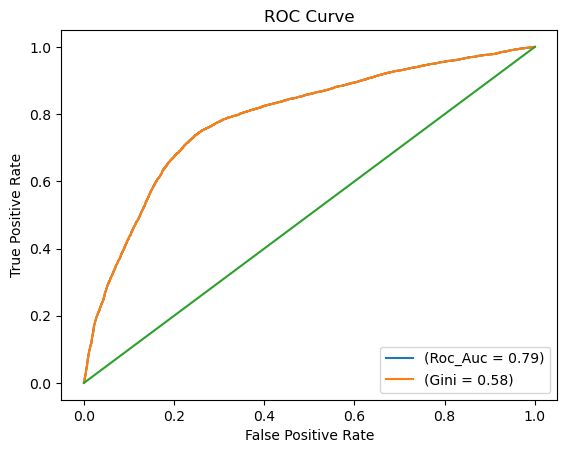

In [75]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Create lists to store the variables, ROC AUC scores, and Gini scores
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a classifier using the single variable on the training set
    clf.fit(X_train_single_var, y_train)
    y_pred_train_single_var = clf.predict_proba(X_train_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the training set
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)

    # Calculate Gini score for the single variable model on the training set
    train_gini = 2 * train_roc - 1

    # Fit a classifier using the single variable on the test set
    y_pred_test_single_var = clf.predict_proba(X_test_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the test set
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)

    # Calculate Gini score for the single variable model on the test set
    test_gini = 2 * test_roc - 1

    # Append the results to the lists
    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

# Create a DataFrame from the results
results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

# Sort the DataFrame by Test Gini score in descending order
results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

# Display the results
#pd.options.display.float_format = '{:.4f}'.format
pd.options.display.float_format = '{:.4%}'.format


results_df_sorted


,Variable,Train Gini,Test Gini
4,OutstandingDebt_woe,51.5335%,51.1732%
2,Delayfromduedate_woe,42.2944%,40.2982%
3,PaymentofMinAmount_woe,30.4059%,29.7636%
5,MonthlyBalance_woe,23.7212%,23.6151%
6,PaymentBehaviour_woe,13.0513%,12.5858%
7,Amountinvestedmonthly_woe,10.9685%,10.4577%
8,ChangedCreditLimit_woe,8.0815%,6.6045%
1,Occupation_woe,3.1649%,4.3458%
0,month_woe,1.1184%,1.2202%


DEPLOYMENT

In [80]:
import pandas as pd

test_data = pd.read_excel(r'C:\Users\Tunzale\Desktop\DSDS\yeni\test_data_LR (1).xlsx')

test_data

,CustomerID,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour
0,CUS0xf55,39,637.0000%,152777.0000%,15968.7185%,53882.0919%,Entrepreneur,July,Yes,HighspentLargevaluepayments
1,CUS0x24af,6,1964.0000%,28184.0000%,11714.7839%,59095.4834%,Mechanic,January,Yes,HighspentMediumvaluepayments
2,CUS0x24af,6,1964.0000%,28184.0000%,5150.5834%,64659.6839%,Mechanic,April,Yes,HighspentLargevaluepayments
3,CUS0x24af,6,1964.0000%,28184.0000%,23679.5961%,50130.6712%,Mechanic,May,Yes,other
4,CUS0x24af,6,1964.0000%,28184.0000%,6492.2693%,63317.9981%,Mechanic,June,Yes,HighspentLargevaluepayments
...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,25,1476.0000%,137513.0000%,21255.6408%,67892.8544%,Lawyer,January,Yes,LowspentLargevaluepayments
1320,CUS0x777b,29,1476.0000%,137513.0000%,46600.0000%,36720.8375%,Lawyer,February,Yes,LowspentSmallvaluepayments
1321,CUS0x777b,29,1476.0000%,137513.0000%,10393.4014%,75755.0938%,Lawyer,March,Yes,HighspentLargevaluepayments
1322,CUS0x777b,29,1476.0000%,137513.0000%,25617.5385%,61530.9567%,Lawyer,April,Yes,other


In [81]:
data

,score,month_woe,Occupation_woe,category,Delayfromduedate_woe,PaymentofMinAmount_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentBehaviour_woe,Amountinvestedmonthly_woe,ChangedCreditLimit_woe
0,0.0000%,1.3036%,-8.0783%,"(9.56, 14.64]",105.0763%,97.3760%,120.9568%,-23.7030%,8.7011%,-12.4014%,13.1787%
1,0.0000%,3.1453%,-8.0783%,"(9.56, 14.64]",105.0763%,97.3760%,120.9568%,-23.7030%,5.7730%,-12.4014%,13.1787%
2,0.0000%,2.1323%,-8.0783%,"(9.56, 14.64]",105.0763%,97.3760%,120.9568%,-23.7030%,-7.0569%,-12.4014%,13.1787%
3,0.0000%,-1.7560%,-8.0783%,"(5.425, 9.56]",105.0763%,97.3760%,120.9568%,-48.9969%,-31.5796%,1.5442%,3.9621%
4,0.0000%,-1.9930%,-8.0783%,"(9.56, 14.64]",105.0763%,97.3760%,120.9568%,21.4456%,18.2672%,-20.0594%,13.1787%
...,...,...,...,...,...,...,...,...,...,...,...
87490,100.0000%,2.1323%,-5.3353%,"(5.425, 9.56]",-10.0916%,97.3760%,127.1917%,21.4456%,18.2672%,-12.4014%,3.9621%
87491,100.0000%,-1.7560%,-5.3353%,"(9.56, 14.64]",-10.0916%,97.3760%,127.1917%,68.3625%,39.1003%,-20.0594%,13.1787%
87492,100.0000%,-1.9930%,-5.3353%,"(9.56, 14.64]",49.6847%,97.3760%,127.1917%,68.3625%,18.2672%,-20.0594%,13.1787%
87493,100.0000%,-3.0392%,-5.3353%,"(9.56, 14.64]",-10.0916%,97.3760%,127.1917%,68.3625%,39.1003%,-20.0594%,13.1787%


In [89]:
data.Delayfromduedate_category.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Delayfromduedate_category'

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x1,y,test_size=0.3,random_state=42)

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

In [87]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [88]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 54.623498090730834
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83     18596
         1.0       0.59      0.46      0.52      7653

    accuracy                           0.75     26249
   macro avg       0.69      0.66      0.67     26249
weighted avg       0.74      0.75      0.74     26249

[[16128  2468]
 [ 4125  3528]]
